# Investigate TMDb Movie data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue

Kaggle have removed the original version of this dataset per a DMCA takedown request from IMDB. In order to minimize the impact, we're replacing it with a similar set of films and data fields from The Movie Database (TMDb) in accordance with their terms of use.

In [119]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import os
import pandas as pd
import requests as req
import matplotlib.pyplot as plt
from IPython.display import display,HTML
import numpy as np
import seaborn as sns

%matplotlib inline
sns.set_style("darkgrid", {"axes.facecolor": ".9"}) # set plot style


In [120]:
# function definition for downloading the dataset
def request_file(url):
    response = req.get(url)
    file_name = url.split('/')[-1]
    # save content of response in the file
    if not os.path.isfile(file_name):
        with open(file_name,'wb') as f:
            f.write(response.content)
    return file_name

In [121]:
# function definition for dataset programmatic assessment

def programmatic_assessment(movies_df):
    displayed_items = [movies_df.info()
                  ,HTML('<style>h4 {text-align: center;}</style><h4>dataframe head</h4>'),movies_df.head()
                  ,HTML('<style>h4 {text-align: center;}</style><h4>dataframe tail</h4>'),movies_df.tail()
                  ,HTML('<style>h4 {text-align: center;}</style><h4>dataframe sample</h4>'),movies_df.sample(5)
                  ,HTML('<style>h4 {text-align: center;}</style><h4>dataframe description</h4>'),movies_df.describe()
                  ,HTML('<style>h4 {text-align: center;}</style><h4>dataframe check duplicates count</h4>'),movies_df.duplicated().sum()
                  ,HTML('<style>h4 {text-align: center;}</style><h4>dataframe check duplicates</h4>'),movies_df[movies_df.duplicated()]
                  ,HTML('<style>h4 {text-align: center;}</style><h4>dataframe check null count</h4>'),movies_df.isnull().sum()
                  ,HTML('<style>h4 {text-align: center;}</style><h4>dataframe check zeros</h4>'),movies_df.isin([0]).sum()]
    for item in displayed_items:
        display(item)                                                                                         

<a id='wrangling'></a>
## Data Wrangling

Wrangling will include these steps:
### Data gathering
Instead of manually download the data, this project will request the file from server side and download it automattically.

In [122]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv"
file_name = request_file(url)
movies_df = pd.read_csv(file_name)

### Data Assessing
Assessment will be done visually and programatically

### Visual assessment
list the dataframe for visual assessment


In [123]:
movies_df

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000e+00,0.000000e+00
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000e+00,0.000000e+00
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000e+00,0.000000e+00
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000e+00,0.000000e+00


### Programmatic assessment

using pandas functions to assess the data



In [124]:
programmatic_assessment(movies_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

None

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000,0.0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
9727,805,tt0063522,0.724527,3200000,33395426,Rosemary's Baby,Mia Farrow|John Cassavetes|Ruth Gordon|Sidney ...,NaN,Roman Polanski,Pray for Rosemary's Baby,...,A young couple moves into an infamous New York...,136,Horror|Drama|Mystery,Paramount Pictures|William Castle Productions,6/12/68,448,7.3,1968,2.006068e+07,2.093547e+08
3473,59108,tt0471042,1.013101,75000000,152930623,Tower Heist,Ben Stiller|Eddie Murphy|Casey Affleck|Alan Al...,http://www.towerheist.com/index.php,Brett Ratner,Ordinary guys. An extraordinary robbery.,...,A luxury condo manager leads a staff of worker...,104,Action|Comedy,Universal Pictures|Image Entertainment|Relativ...,11/2/11,588,5.8,2011,7.270485e+07,1.482506e+08
2360,70712,tt1684928,0.097594,0,0,Te presento a Laura,Martha Higareda|Kuno Becker|Eugenio Derbez|Joa...,NaN,Fez Ortega,NaN,...,This is the story of 23-year-old Laura who liv...,98,Romance|Comedy|Drama,NaN,10/29/10,11,6.6,2010,0.000000e+00,0.000000e+00
3531,64328,tt1204342,0.699052,45000000,165184237,The Muppets,Amy Adams|Jason Segel|Emily Blunt|John Krasins...,http://disney.go.com/muppets/,James Bobin,They're closer than you think.,...,When Kermit the Frog and the Muppets learn tha...,103,Comedy|Family|Music,Walt Disney Pictures,11/22/11,328,6.4,2011,4.362291e+07,1.601293e+08
5848,220494,tt1776086,0.151378,0,0,Bettie Page Reveals All,Bettie Page|Dita Von Teese|Hugh M. Hefner|Rebe...,http://www.musicboxfilms.com/bettiepage,Mark Mori,NaN,...,The world's greatest pinup model and cult icon...,101,Documentary,Single Spark Pictures|Music Box Films,11/22/13,10,7.0,2013,0.000000e+00,0.000000e+00


,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


1

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

id                         0
imdb_id                    0
popularity                 0
budget                  5696
revenue                 6016
original_title             0
cast                       0
homepage                   0
director                   0
tagline                    0
keywords                   0
overview                   0
runtime                   31
genres                     0
production_companies       0
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj              5696
revenue_adj             6016
dtype: int64

### Issues and findings

1. drop duplicates
2. convert release date to datetime object
3. split the generated datatime object to day,month and year
4. convert 0 revenue and budget to Nan
5. drop useless coloumns
6. drop nan values in rest of columns
7. split genres coloumn into multiple columns
8. drop genres coloumn from movies dataframe
9. calculate profit

### Data CleanUp
backup data into backup dataframes

In [125]:
#backup data into backup dataframes
movies_df_bkup = movies_df.copy()

###### Define
1. drop duplicates

###### Code

In [126]:
movies_df.drop_duplicates(keep='first',inplace=True)

###### Test

In [127]:
movies_df[movies_df.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


###### Define
2. convert release date to time objects

###### Code

In [128]:
movies_df['release_date'] = pd.to_datetime(movies_df['release_date'])

###### Test

In [129]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    10865 non-null  int64         
 1   imdb_id               10855 non-null  object        
 2   popularity            10865 non-null  float64       
 3   budget                10865 non-null  int64         
 4   revenue               10865 non-null  int64         
 5   original_title        10865 non-null  object        
 6   cast                  10789 non-null  object        
 7   homepage              2936 non-null   object        
 8   director              10821 non-null  object        
 9   tagline               8041 non-null   object        
 10  keywords              9372 non-null   object        
 11  overview              10861 non-null  object        
 12  runtime               10865 non-null  int64         
 13  genres          

###### Define

3. split the generated datatime object to day,month and year

###### Code

In [130]:
movies_df['month'] = movies_df.release_date.dt.month
movies_df['day'] = movies_df.release_date.dt.day

###### Test

In [131]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    10865 non-null  int64         
 1   imdb_id               10855 non-null  object        
 2   popularity            10865 non-null  float64       
 3   budget                10865 non-null  int64         
 4   revenue               10865 non-null  int64         
 5   original_title        10865 non-null  object        
 6   cast                  10789 non-null  object        
 7   homepage              2936 non-null   object        
 8   director              10821 non-null  object        
 9   tagline               8041 non-null   object        
 10  keywords              9372 non-null   object        
 11  overview              10861 non-null  object        
 12  runtime               10865 non-null  int64         
 13  genres          

###### Define
4. convert 0 revenue and budget to Nan

###### Code

In [132]:
movies_df["budget_adj"].replace(0,np.nan,inplace=True)
movies_df["runtime"].replace(0,np.nan,inplace=True)

###### Test

In [133]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    10865 non-null  int64         
 1   imdb_id               10855 non-null  object        
 2   popularity            10865 non-null  float64       
 3   budget                10865 non-null  int64         
 4   revenue               10865 non-null  int64         
 5   original_title        10865 non-null  object        
 6   cast                  10789 non-null  object        
 7   homepage              2936 non-null   object        
 8   director              10821 non-null  object        
 9   tagline               8041 non-null   object        
 10  keywords              9372 non-null   object        
 11  overview              10861 non-null  object        
 12  runtime               10834 non-null  float64       
 13  genres          

###### Define
5. drop useless coloumns

###### Code

In [134]:
#handle column existance exception through try and except
try:
    movies_df.drop(['imdb_id'
                    ,'budget'
                    ,'revenue'
                    ,'homepage'
                    ,'tagline'
                    ,'keywords'
                    ,'overview'
                    ,'release_date'],
               axis=1,inplace=True)
except:
    pass

###### Test

In [135]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10865 non-null  int64  
 1   popularity            10865 non-null  float64
 2   original_title        10865 non-null  object 
 3   cast                  10789 non-null  object 
 4   director              10821 non-null  object 
 5   runtime               10834 non-null  float64
 6   genres                10842 non-null  object 
 7   production_companies  9835 non-null   object 
 8   vote_count            10865 non-null  int64  
 9   vote_average          10865 non-null  float64
 10  release_year          10865 non-null  int64  
 11  budget_adj            5169 non-null   float64
 12  revenue_adj           10865 non-null  float64
 13  month                 10865 non-null  int64  
 14  day                   10865 non-null  int64  
dtypes: float64(5), int6

###### Define

6. drop nan values in rest of columns

###### Code

In [136]:
movies_df.dropna(inplace=True)

###### Test

In [137]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5020 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5020 non-null   int64  
 1   popularity            5020 non-null   float64
 2   original_title        5020 non-null   object 
 3   cast                  5020 non-null   object 
 4   director              5020 non-null   object 
 5   runtime               5020 non-null   float64
 6   genres                5020 non-null   object 
 7   production_companies  5020 non-null   object 
 8   vote_count            5020 non-null   int64  
 9   vote_average          5020 non-null   float64
 10  release_year          5020 non-null   int64  
 11  budget_adj            5020 non-null   float64
 12  revenue_adj           5020 non-null   float64
 13  month                 5020 non-null   int64  
 14  day                   5020 non-null   int64  
dtypes: float64(5), int64

###### Define
7. split generes coloumn into multiple columns

###### Code

In [138]:
genres_per_id = movies_df.genres.apply(lambda x: pd.value_counts(x.split('|'))).fillna(0)

###### Test

In [139]:
genres_per_id.head()

,Science Fiction,Thriller,Action,Adventure,Fantasy,Crime,Drama,Western,Family,Comedy,Animation,Mystery,Romance,War,History,Music,Horror,Documentary,TV Movie,Foreign
0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


###### Define
8. drop genres coloumn from movies dataframe

###### Code

In [140]:
try:
    movies_df.drop('genres',axis=1,inplace=True)
except:
    pass

###### Test

In [141]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5020 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5020 non-null   int64  
 1   popularity            5020 non-null   float64
 2   original_title        5020 non-null   object 
 3   cast                  5020 non-null   object 
 4   director              5020 non-null   object 
 5   runtime               5020 non-null   float64
 6   production_companies  5020 non-null   object 
 7   vote_count            5020 non-null   int64  
 8   vote_average          5020 non-null   float64
 9   release_year          5020 non-null   int64  
 10  budget_adj            5020 non-null   float64
 11  revenue_adj           5020 non-null   float64
 12  month                 5020 non-null   int64  
 13  day                   5020 non-null   int64  
dtypes: float64(5), int64(5), object(4)
memory usage: 588.3+ KB


###### Define
9. calculate profit

###### Code

In [142]:
movies_df['profit']=movies_df['revenue_adj']-movies_df['budget_adj']


###### Test

In [143]:
movies_df.head()

,id,popularity,original_title,cast,director,runtime,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,month,day,profit
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,6,9,1.254446e+09
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08,5,13,2.101614e+08
2,262500,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119.0,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,1.012000e+08,2.716190e+08,3,18,1.704191e+08
3,140607,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136.0,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,1.839999e+08,1.902723e+09,12,15,1.718723e+09
4,168259,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137.0,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,1.747999e+08,1.385749e+09,4,1,1.210949e+09


In [144]:
genres_per_id.to_csv('genres_per_id.csv',index=False)

In [145]:
#save cleaned version of data to be used in visualization
movies_df.to_csv('movies-cleaned.csv',index=False)

<a id='eda'></a>
## Exploratory Data Analysis

This step explores the data to answer the below questions and plot different visualizations to identify patterns and dependencies.



### What is the difference between popularity and vote average?

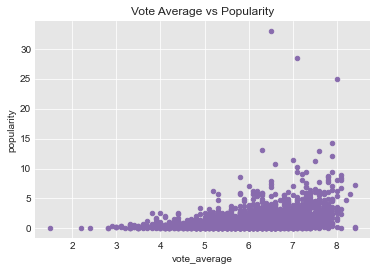

In [146]:
movies_df.plot(x='vote_average',y='popularity',kind='scatter', color='#886bad')
plt.title('Vote Average vs Popularity')
plt.show()


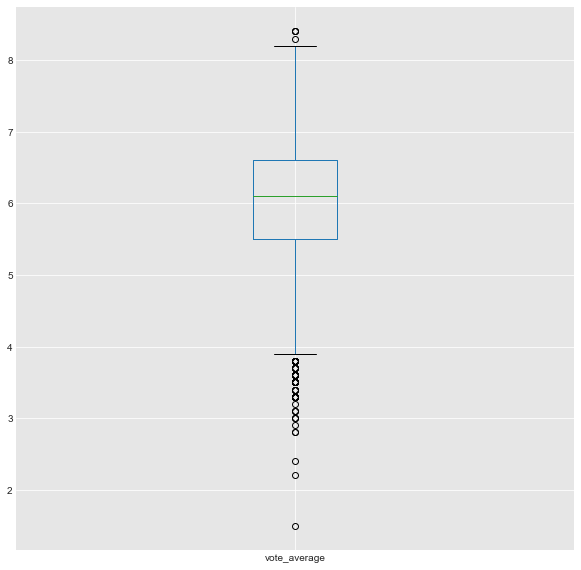

In [147]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
plt.figure(figsize=[10,10])
movies_df['vote_average'].plot(kind='box')
plt.show()


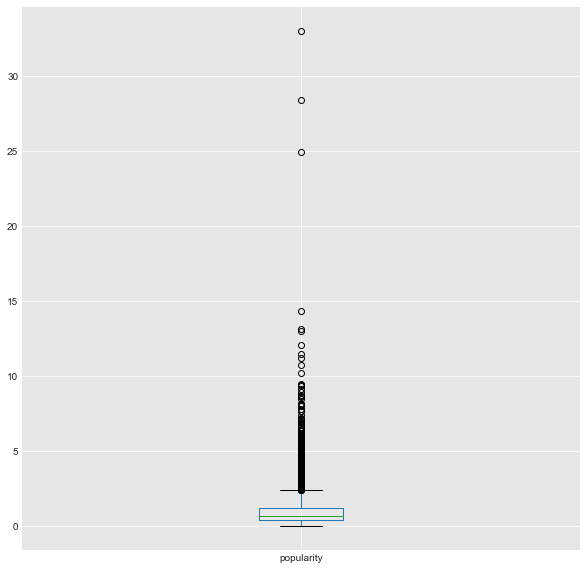

In [148]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
plt.figure(figsize=[10,10])
movies_df['popularity'].plot(kind='box')
plt.show()

###### Findings
- As I understood from the data, popularity and vote average represent same thing and they approximately have same results as shown in the scatter plot. However, The box plot shows that too but vote average is much accurate as it reduces the outlayers appears in the popularity box plot.
So, I will consider the upcoming visualization with the vote average to be more accurate.

### Which movies have the highest and lowest vote average?

In [149]:
"""
    Generic function that used for barplot 
    movies_df: movies dataframe
    x_axis: data represented in x_axis
    y_axis: datarepresented in y_axis
    x_label: x_axis label
    y_label: y_axis label
    graph_title: title describing the relationship
    is_ascending: boolean used for sorting value default value is True
    """

def movie_one_variable_visualization(movies_df,x_axis,y_axis,x_label,y_label,graph_title,is_ascending=True):
    plt.figure(figsize=[20,20])
    sns.barplot(data=movies_df[[x_axis,y_axis]].sort_values(by=y_axis,ascending=is_ascending)[0:20], x=x_axis, y=y_axis)
    plt.xticks(rotation=90)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(graph_title)

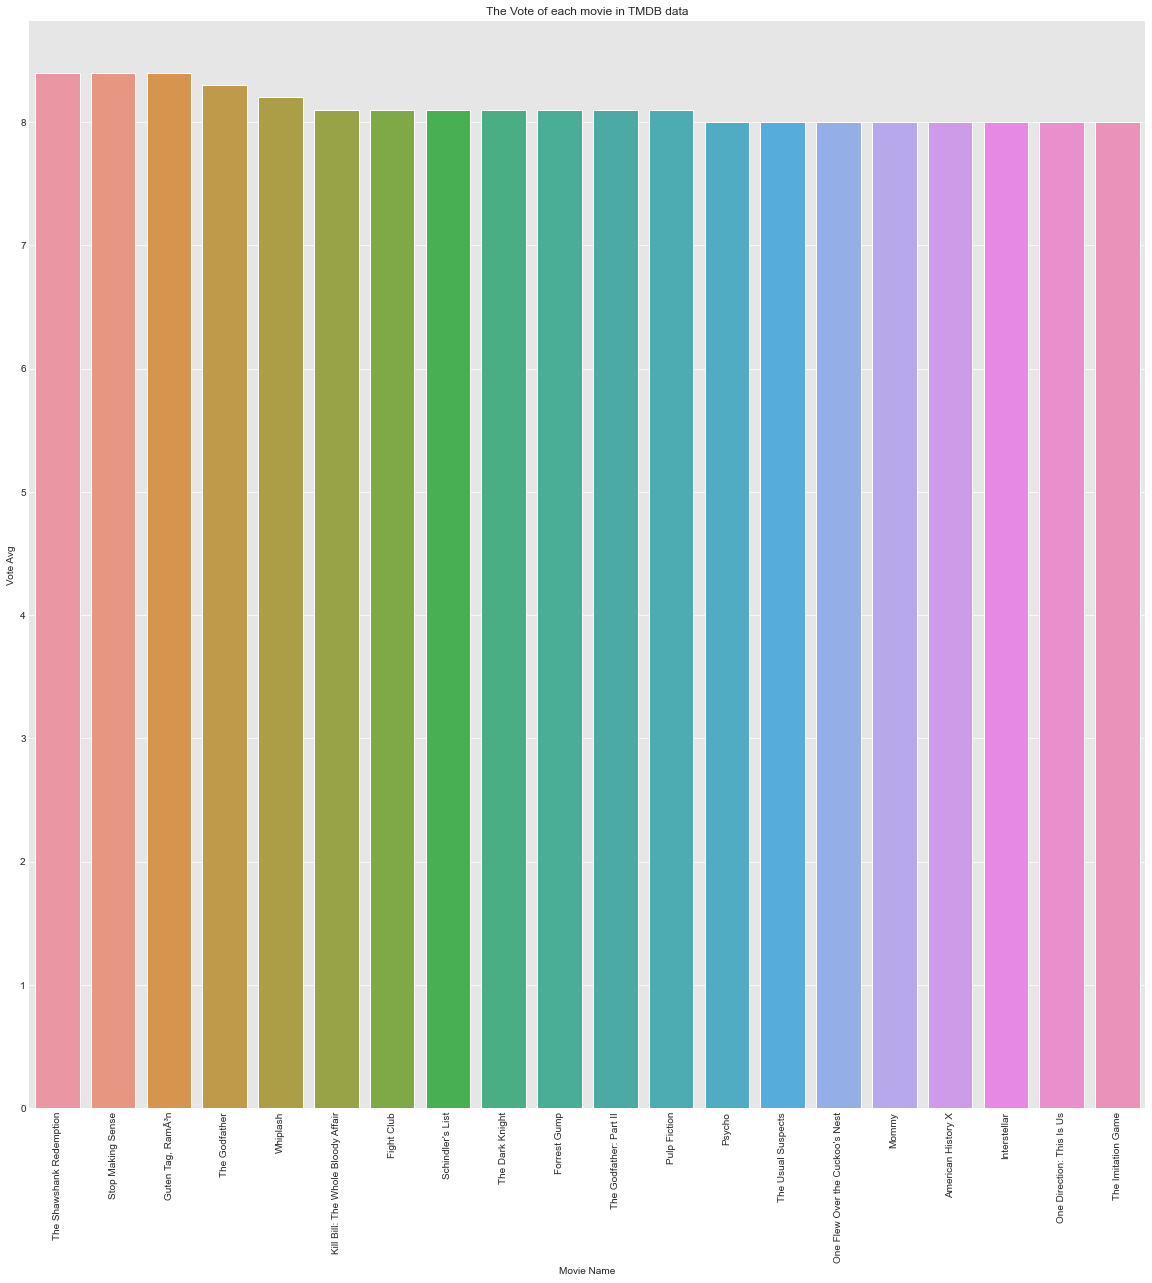

In [150]:
movie_one_variable_visualization(movies_df,'original_title','vote_average','Movie Name','Vote Avg','The Vote of each movie in TMDB data',False)

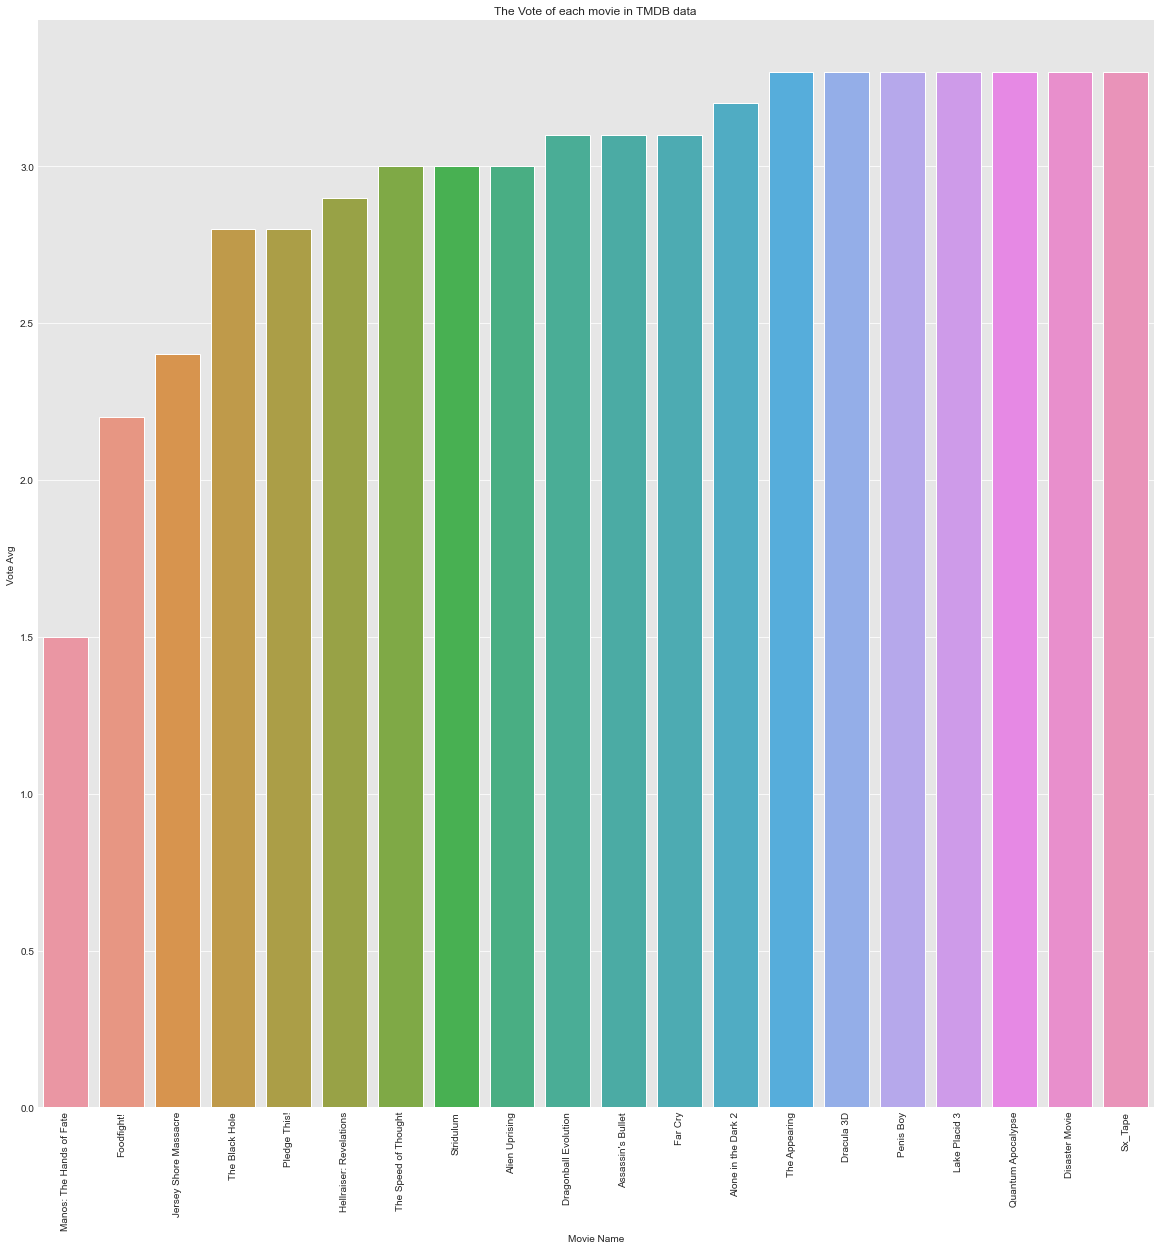

In [151]:
movie_one_variable_visualization(movies_df,'original_title','vote_average','Movie Name','Vote Avg','The Vote of each movie in TMDB data')

###### Findings
 - The previous 2 graphs show that the highest vote goes for <b>The Shawshank Redemption</b> and the lowest vote goes for <b>Manos TheHands of Fate</b>

### Which movie got the highest profit?

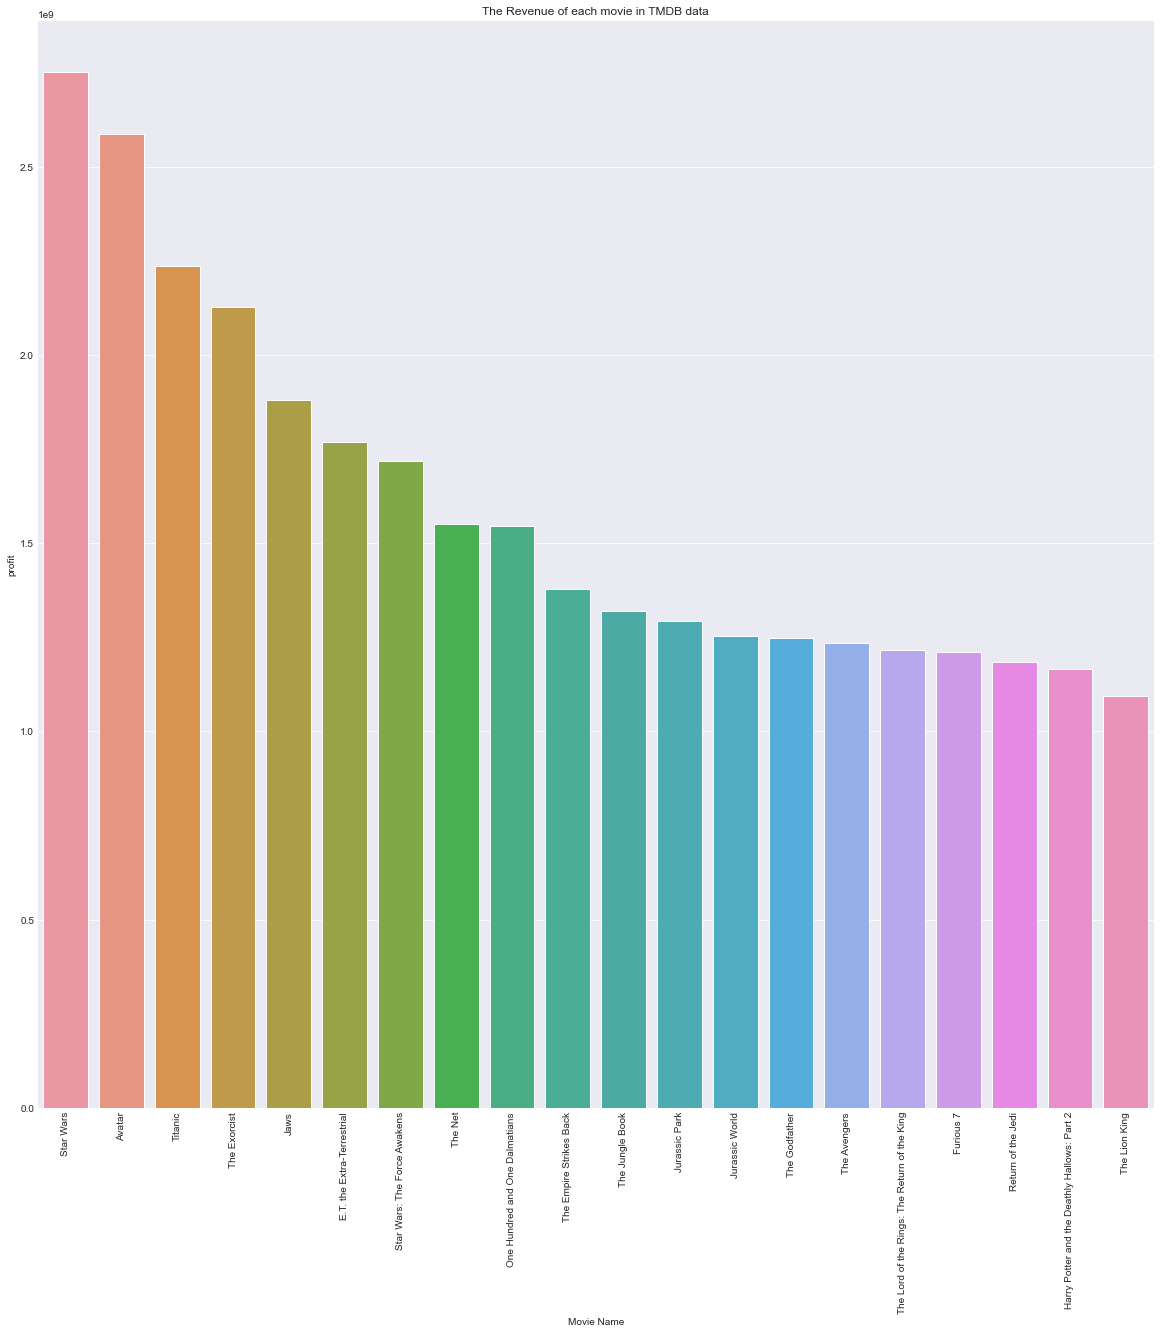

In [168]:
movie_one_variable_visualization(movies_df,'original_title','profit','Movie Name','profit','The Revenue of each movie in TMDB data',False)

###### Findings
- Avatar achived the highest profit

### Which company made the most profit?

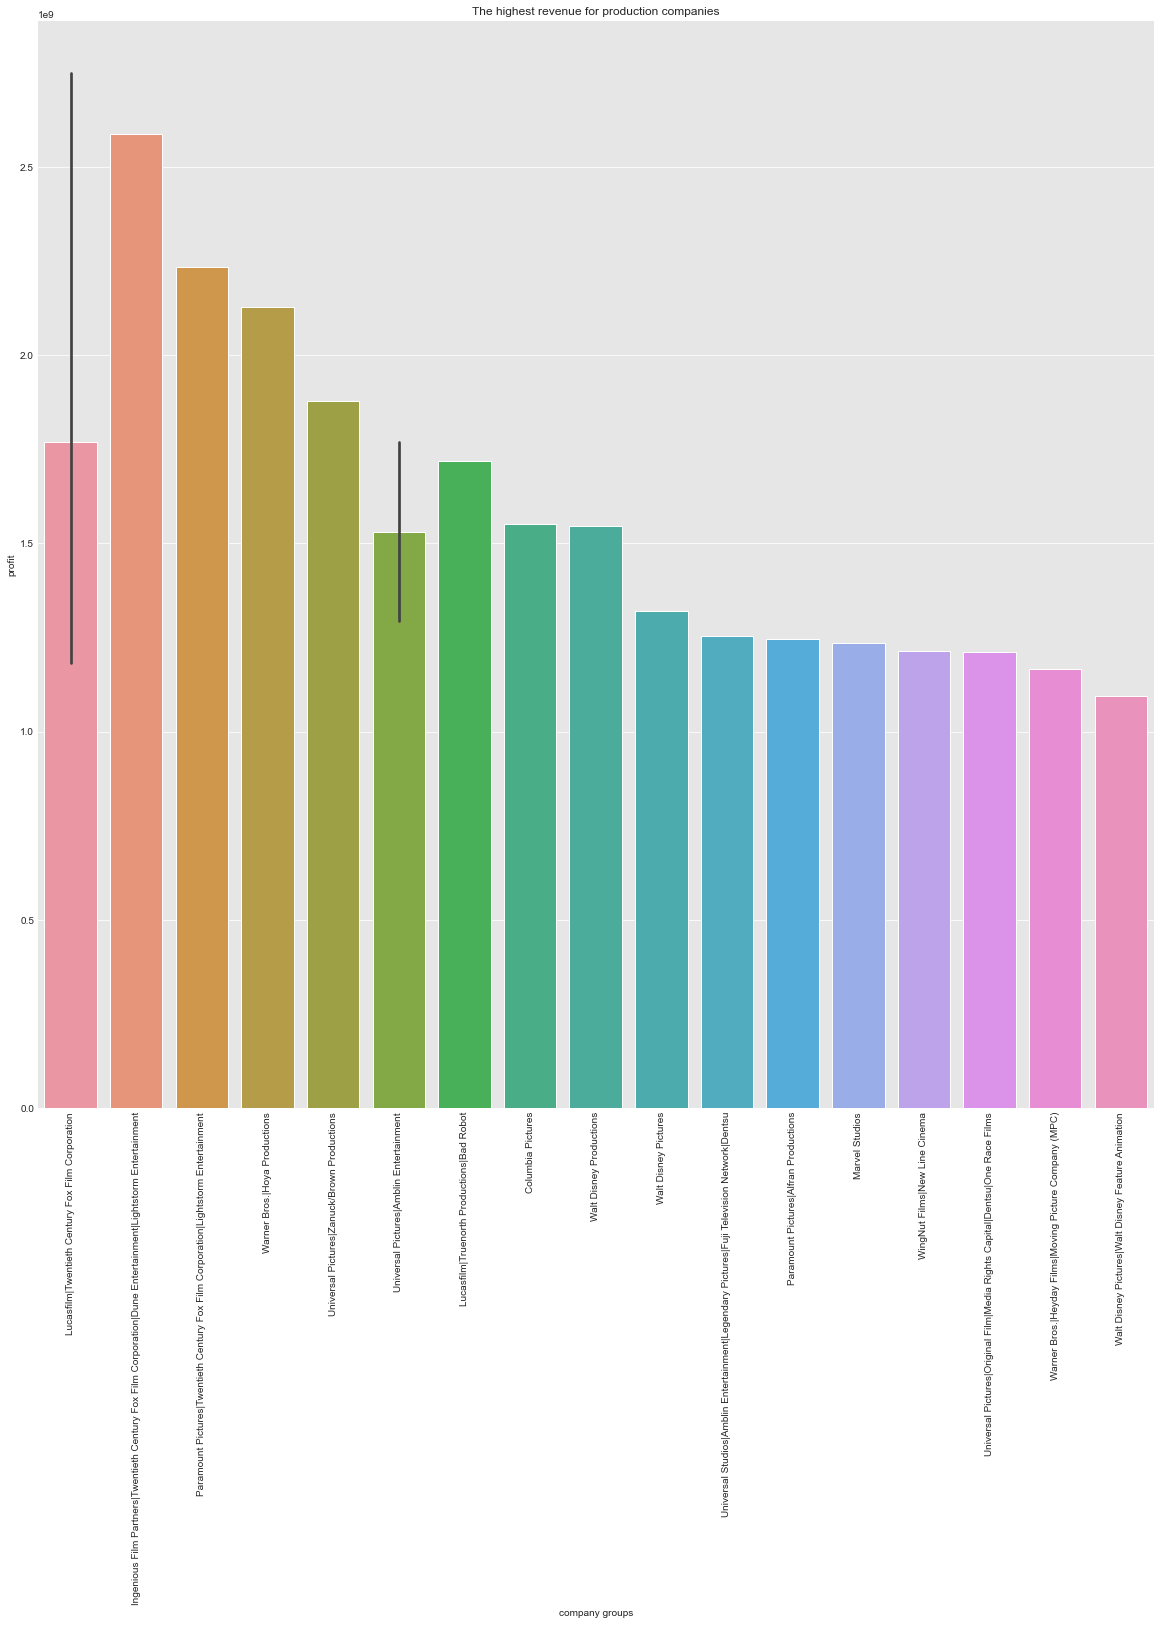

In [153]:
movie_one_variable_visualization(movies_df,'production_companies','profit','company groups','profit','The highest revenue for production companies',False)

###### Findings
- Lucasfilm & Twentieth Century Fox Film Corporation are the perfect example for coopration in film making

### What is the relationship between budget and revenue over the years?

Text(0.5, 1.0, 'Budget & Revenue over time')

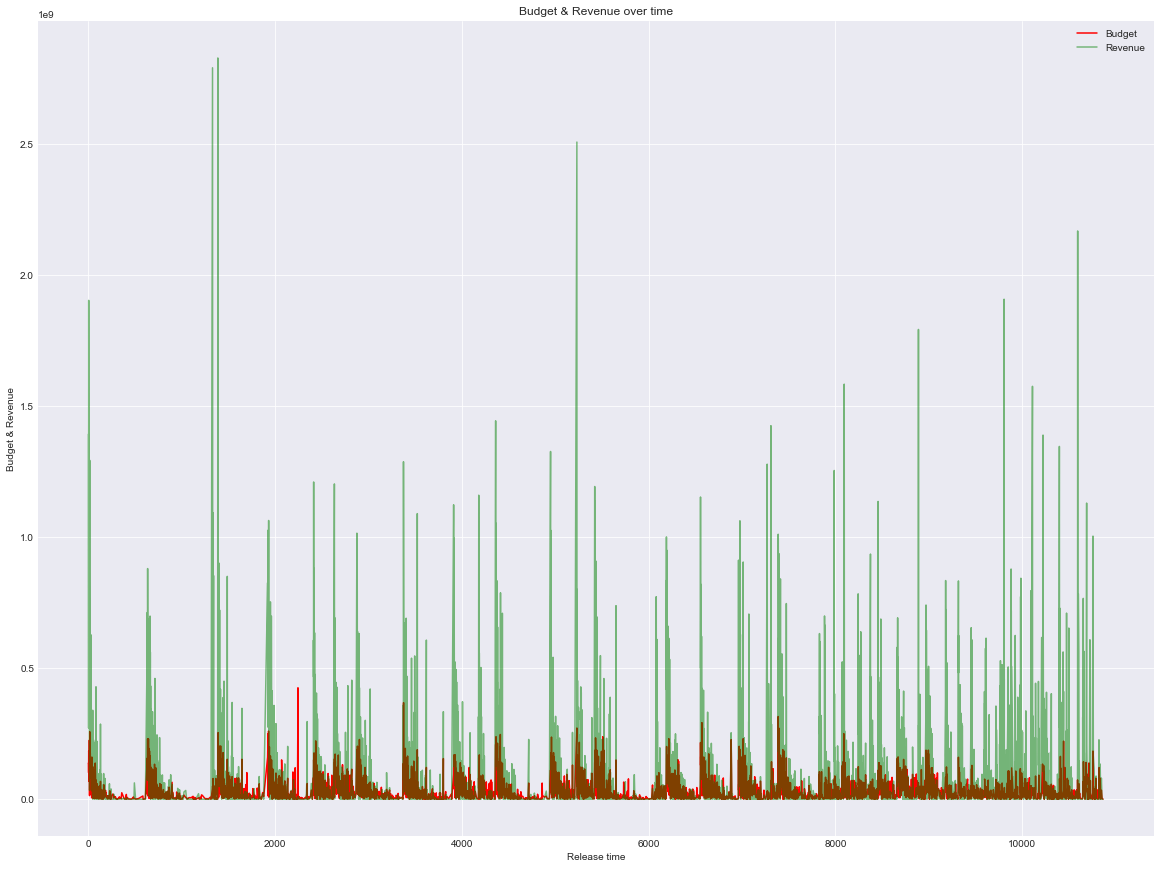

In [170]:
time_df = movies_df[['release_year', 'budget_adj', 'revenue_adj']]

fig = plt.figure(figsize=(20,15))
time_df['budget_adj'].plot(color = 'red', label='Budget')
time_df['revenue_adj'].plot(color = 'green', alpha=0.5, label='Revenue')
plt.style.use('seaborn-darkgrid')
plt.legend(loc='upper right')
plt.xlabel('Release time')
plt.ylabel('Budget & Revenue')
plt.title('Budget & Revenue over time')

###### Findings
- The graph above shows that companies goes for lower budget accross the year and higher revenue too